# Data Analysis for "Making Formulog Fast"

This Jupyter Notebook analyzes our experimental data.
It calculates the numbers reported in the paper, and also generates the figures and tables.

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

In [4]:
data = pd.read_csv("results.csv")
data.head()

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,execute_mem,smt_calls,smt_time,smt_mode,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,0.811192,95749.0,3318.25,push-pop,3318.25,0.0,0.241000,0.344494,0.0,14.16749
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,0.946088,95749.0,3320.21,push-pop,3320.21,0.0,0.241172,0.344322,0.0,14.16749
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,0.814584,95749.0,3322.75,push-pop,3322.75,0.0,0.241262,0.344232,0.0,14.16749
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800136,95749.0,3314.25,push-pop,3314.25,0.0,0.240867,0.344627,0.0,14.16749
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,0.822832,95749.0,3332.87,push-pop,3332.87,0.0,0.240940,0.344554,0.0,14.16749


In [5]:
def get_time(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_time"]
    else:
        val = row["execute_time"]
    if pd.isnull(val):
        val = 1800  # timeout amount
    return val

In [6]:
data["time"] = data.apply(get_time, axis=1)

In [7]:
def get_cpu(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_cpu"]
    else:
        val = row["execute_cpu"]
    return val

In [8]:
data["cpu"] = data.apply(get_cpu, axis=1)

In [9]:
def get_mem(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_mem"]
    else:
        val = row["execute_mem"]
    return val

In [10]:
data["mem"] = data.apply(get_mem, axis=1)

In [11]:
data

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,smt_mode,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work,time,cpu,mem
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,push-pop,3318.250,0.000000,0.241000,0.344494,0.0,14.167490,101.32,3626.0,0.811192
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,push-pop,3320.210,0.000000,0.241172,0.344322,0.0,14.167490,102.01,3615.0,0.946088
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,push-pop,3322.750,0.000000,0.241262,0.344232,0.0,14.167490,102.33,3610.0,0.814584
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,push-pop,3314.250,0.000000,0.240867,0.344627,0.0,14.167490,102.21,3615.0,0.800136
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,push-pop,3332.870,0.000000,0.240940,0.344554,0.0,14.167490,102.37,3612.0,0.822832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,symex,sort-7,interpret-unbatched,y,75.80,3910.0,96.054736,NaN,NaN,NaN,...,check-sat-assuming,906.752,2.126222,4.287825,0.420429,4094.0,535.185681,75.80,3910.0,96.054736
1108,symex,sort-7,interpret-unbatched,y,76.21,3929.0,93.794532,NaN,NaN,NaN,...,check-sat-assuming,929.863,2.531134,4.316493,0.391761,3817.0,537.329154,76.21,3929.0,93.794532
1109,symex,sort-7,interpret-unbatched,y,76.72,3929.0,95.588856,NaN,NaN,NaN,...,check-sat-assuming,905.461,0.261572,4.278626,0.429628,4181.0,538.401869,76.72,3929.0,95.588856
1110,symex,sort-7,interpret-unbatched,y,76.29,3924.0,93.915020,NaN,NaN,NaN,...,check-sat-assuming,921.726,2.066026,4.280040,0.428214,4169.0,533.477455,76.29,3924.0,93.915020


In [12]:
# Rename modes according to what we use in the paper
new_mode_names = {
    "interpret": "interpret",
    "interpret-reorder": "interpret",
    "interpret-unbatched": "interpret-eager",
    "compile": "compile",
    "compile-reorder": "compile",
    "compile-unbatched": "compile-eager",
    "klee": "klee",
    "cbmc": "cbmc",
    "scuba": "scuba",
}

data["mode"] = data["mode"].map(new_mode_names)

In [13]:
medians = data.groupby(["case_study", "benchmark", "mode"]).agg(
    {
        "smt_time": ["median"],
        "smt_cache_clears": ["median"],
        "time": ["median"],
        "work": ["median"],
        "cpu": ["median"],
        "mem": ["median"],
        "smt_cache_misses": ["median"],
    }
)

In [14]:
medians.columns = [
    "median_smt_time",
    "median_smt_cache_clears",
    "median_time",
    "median_work",
    "median_cpu",
    "median_mem",
    "median_smt_cache_misses",
]
medians = medians.reset_index()

In [15]:
medians

,case_study,benchmark,mode,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses
0,dminor,all-1,compile,3.102315,0.0,4.100,0.123449,2533.5,0.053422,0.004847
1,dminor,all-1,compile-eager,4.090370,0.0,0.605,0.106515,1478.0,0.049348,0.004832
2,dminor,all-1,interpret,1.470858,0.0,4.755,0.107631,396.5,1.394936,0.003845
3,dminor,all-1,interpret-eager,2.997254,0.0,2.465,0.107726,899.5,1.463166,0.003919
4,dminor,all-10,compile,30.905150,0.0,5.375,1.210640,3028.5,0.160166,0.045404
...,...,...,...,...,...,...,...,...,...,...
117,symex,sort-7,compile,1525.498372,7275.5,76.765,327.071747,3688.5,6.748504,0.743986
118,symex,sort-7,compile-eager,763.128155,371.5,82.020,305.256210,4022.5,6.952310,0.040767
119,symex,sort-7,interpret,1408.705480,7192.5,112.555,531.409469,3015.0,89.512246,0.735712
120,symex,sort-7,interpret-eager,909.479263,4083.5,76.250,535.890183,3922.0,94.246508,0.419407


In [16]:
def stats(df, process_row):
    def compute(df):
        res = df.apply(process_row, axis=1).agg(["mean", "min", "median", "max"])
        print(res)

    print("all:")
    compute(df)
    print("\ndminor:")
    compute(df[df["case_study"] == "dminor"])
    print("\nscuba:")
    compute(df[df["case_study"] == "scuba"])
    print("\nsymex:")
    compute(df[df["case_study"] == "symex"])


def speedup(df, mode, baseline):
    """Return the speedup of `mode` relative to `baseline`, calculated as
    `baseline` divided by `mode`"""
    def process_row(row):
        if not pd.isnull(row[mode]):
            return row[baseline] / row[mode]

    return stats(df, process_row)


def widen(df, val):
    return df.pivot(
        index=["case_study", "benchmark"], columns="mode", values=val
    ).reset_index()

In [17]:
times = widen(medians, "median_time")
smt_times = widen(medians, "median_smt_time")
work = widen(medians, "median_work")
cpu = widen(medians, "median_cpu")
mem = widen(medians, "median_mem")
smt_cache_misses = widen(medians, "median_smt_cache_misses")

In [18]:
def smt_heavy(df):
    return df[(df["case_study"] != "scuba")]

## Overall Performance

The overall performance improvement relative to the baseline interpreter, using compilation and eager evaluation (as appropriate):

In [19]:
def best_compile_vs_interpret(row):
    if row["case_study"] != "scuba":
        return row["interpret"] / row["compile-eager"]
    return row["interpret"] / row["compile"]


stats(times, best_compile_vs_interpret)

all:
mean       6.351372
min        0.735114
median     3.417365
max       38.069571
dtype: float64

dminor:
mean       7.242347
min        1.728746
median     7.859504
max       12.138790
dtype: float64

scuba:
mean      3.191712
min       1.280072
median    3.398950
max       4.295120
dtype: float64

symex:
mean       9.243739
min        0.735114
median     3.916049
max       38.069571
dtype: float64


In [20]:
speedup(smt_heavy(times), "compile", baseline="interpret")

all:
mean      1.476971
min       0.970307
median    1.393056
max       3.173023
dtype: float64

dminor:
mean      1.862495
min       1.159756
median    1.254705
max       3.173023
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.361313
min       0.970307
median    1.403598
max       1.888889
dtype: float64


In [21]:
def compile_or_interpret_eager_vs_interpret(row):
    if row["case_study"] != "scuba":
        return row["interpret"] / row["interpret-eager"]
    return row["interpret"] / row["compile"]


stats(times, compile_or_interpret_eager_vs_interpret)

all:
mean       4.622883
min        0.690982
median     3.305607
max       31.998228
dtype: float64

dminor:
mean      2.451034
min       1.353691
median    1.929006
max       4.070406
dtype: float64

scuba:
mean      3.191712
min       1.280072
median    3.398950
max       4.295120
dtype: float64

symex:
mean       6.705609
min        0.690982
median     1.611598
max       31.998228
dtype: float64


In [22]:
speedup(smt_heavy(times), "interpret-eager", baseline="interpret")

all:
mean       5.723784
min        0.690982
median     1.660079
max       31.998228
dtype: float64

dminor:
mean      2.451034
min       1.353691
median    1.929006
max       4.070406
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       6.705609
min        0.690982
median     1.611598
max       31.998228
dtype: float64


## Section 3.3 (Semi-Naive Compiler Experiments)

In [23]:
speedup(times, "compile", baseline="interpret")

all:
mean      2.222510
min       0.970307
median    1.671862
max       4.295120
dtype: float64

dminor:
mean      1.862495
min       1.159756
median    1.254705
max       3.173023
dtype: float64

scuba:
mean      3.191712
min       1.280072
median    3.398950
max       4.295120
dtype: float64

symex:
mean      1.361313
min       0.970307
median    1.403598
max       1.888889
dtype: float64


In [24]:
speedup(mem, "compile", baseline="interpret")

all:
mean       37.990933
min         6.749459
median     20.432258
max       108.125473
dtype: float64

dminor:
mean      36.238415
min       26.111639
median    39.440456
max       43.163151
dtype: float64

scuba:
mean       62.602557
min         7.759086
median     66.286075
max       108.125473
dtype: float64

symex:
mean      13.905064
min        6.749459
median    13.010602
max       20.432258
dtype: float64


In [25]:
base_compiler_data = data[(data["mode"] == "interpret") | (data["mode"] == "compile")]

In [26]:
os.makedirs("figures", exist_ok=True)

In [27]:
# From https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 395.8225

<Figure size 640x480 with 0 Axes>

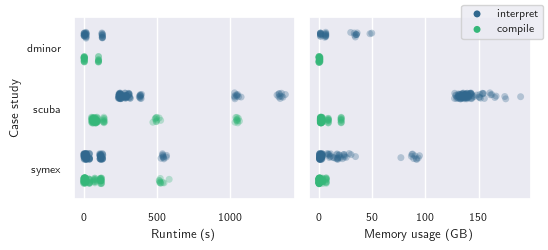

In [28]:
# Figure 4

plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2)
modes = ["interpret", "compile"]
case_studies = ["dminor", "scuba", "symex"]
sns.stripplot(
    data=base_compiler_data,
    y="case_study",
    hue="mode",
    x="time",
    jitter=True,
    dodge=True,
    hue_order=modes,
    order=case_studies,
    legend=None,
    alpha=0.3,
    ax=ax1,
    palette="viridis",
)
ax1.set(ylabel="Case study", xlabel="Runtime (s)")

sns.stripplot(
    data=base_compiler_data,
    y="case_study",
    hue="mode",
    x="mem",
    jitter=True,
    dodge=True,
    hue_order=modes,
    order=case_studies,
    legend=None,
    alpha=0.3,
    ax=ax2,
    palette="viridis",
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel="Memory usage (GB)")

leg = fig.legend(modes)
for lh in leg.legend_handles:
    lh.set_alpha(1)
(inch_width, _) = set_size(width)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(os.path.join("figures", "figure4.pdf"), bbox_inches="tight", dpi=100)

## Section 5.3 (Eager Evaluation Experiments)

In [29]:
speedup(smt_heavy(times), "interpret-eager", baseline="interpret")

all:
mean       5.723784
min        0.690982
median     1.660079
max       31.998228
dtype: float64

dminor:
mean      2.451034
min       1.353691
median    1.929006
max       4.070406
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       6.705609
min        0.690982
median     1.611598
max       31.998228
dtype: float64


In [30]:
speedup(smt_heavy(times), "interpret-eager", baseline="compile")

all:
mean       5.183699
min        0.413301
median     1.173913
max       30.924395
dtype: float64

dminor:
mean      1.341665
min       1.078892
median    1.282816
max       1.663286
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       6.336310
min        0.413301
median     1.147995
max       30.924395
dtype: float64


In [31]:
speedup(smt_heavy(times), "compile-eager", baseline="interpret-eager")

all:
mean      1.790618
min       0.929651
median    1.277061
max       4.074380
dtype: float64

dminor:
mean      2.777883
min       1.277061
median    2.982206
max       4.074380
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.494438
min       0.929651
median    1.209665
max       3.515625
dtype: float64


In [32]:
speedup(smt_heavy(times), "compile-eager", baseline="compile")

all:
mean       7.592252
min        0.443158
median     2.531250
max       36.791989
dtype: float64

dminor:
mean      3.993431
min       1.377811
median    3.825623
max       6.776860
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       8.671898
min        0.443158
median     2.344317
max       36.791989
dtype: float64


In [33]:
speedup(smt_heavy(mem), "interpret", baseline="interpret-eager")

all:
mean      1.592720
min       0.961789
median    1.133289
max       5.211651
dtype: float64

dminor:
mean      1.006173
min       0.961789
median    1.007816
max       1.048913
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.768684
min       1.006421
median    1.175523
max       5.211651
dtype: float64


In [34]:
speedup(smt_heavy(mem), "compile", baseline="compile-eager")

all:
mean      1.137282
min       0.923739
median    1.068240
max       1.480786
dtype: float64

dminor:
mean      1.120370
min       0.923739
median    1.078305
max       1.359065
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.142355
min       0.974475
median    1.049220
max       1.480786
dtype: float64


In [35]:
speedup(smt_heavy(cpu), "interpret", baseline="interpret-eager")

all:
mean       3.900008
min        0.932584
median     1.894315
max       12.262712
dtype: float64

dminor:
mean      2.808618
min       1.343905
median    2.268600
max       4.813350
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       4.227424
min        0.932584
median     1.862280
max       12.262712
dtype: float64


In [36]:
speedup(smt_heavy(cpu), "compile", baseline="compile-eager")

all:
mean      1.596687
min       0.185869
median    1.090552
max       7.101463
dtype: float64

dminor:
mean      0.884868
min       0.583383
median    1.006769
max       1.064454
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.810233
min       0.185869
median    1.130454
max       7.101463
dtype: float64


In [37]:
speedup(smt_heavy(work), "interpret", baseline="interpret-eager")

all:
mean      1.005902
min       1.000883
median    1.006434
max       1.009558
dtype: float64

dminor:
mean      1.006602
min       1.000883
median    1.009366
max       1.009558
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.005692
min       1.001465
median    1.006085
max       1.009137
dtype: float64


In [38]:
speedup(smt_heavy(work), "compile-eager", baseline="compile")

all:
mean      1.088267
min       1.070007
median    1.078262
max       1.158982
dtype: float64

dminor:
mean      1.123810
min       1.096852
median    1.115597
max       1.158982
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.077604
min       1.070007
median    1.076432
max       1.084137
dtype: float64


In [39]:
speedup(smt_heavy(smt_cache_misses), "interpret-eager", baseline="compile")

all:
mean      2.197102
min       0.337818
median    1.236668
max       5.655026
dtype: float64

dminor:
mean      1.155915
min       0.968521
median    1.236668
max       1.262555
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      2.509458
min       0.337818
median    1.423925
max       5.655026
dtype: float64


In [40]:
speedup(smt_heavy(smt_cache_misses), "compile-eager", baseline="compile")

all:
mean       4.584957
min        0.292701
median     1.078182
max       18.249724
dtype: float64

dminor:
mean      0.943934
min       0.796725
median    1.002897
max       1.032179
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       5.677264
min        0.292701
median     3.648963
max       18.249724
dtype: float64


In [41]:
speedup(smt_heavy(smt_times), "interpret-eager", baseline="compile")

all:
mean      1.316540
min       0.280009
median    1.150022
max       2.735215
dtype: float64

dminor:
mean      1.077737
min       1.035053
median    1.048136
max       1.150022
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.388181
min       0.280009
median    1.532784
max       2.735215
dtype: float64


In [42]:
speedup(smt_heavy(smt_times), "compile-eager", baseline="compile")

all:
mean      1.305949
min       0.246782
median    1.193457
max       2.584454
dtype: float64

dminor:
mean      0.970026
min       0.758444
median    0.958178
max       1.193457
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.406726
min       0.246782
median    1.555624
max       2.584454
dtype: float64


In [43]:
eager_eval_data = data[data["case_study"] != "scuba"]

<Figure size 640x480 with 0 Axes>

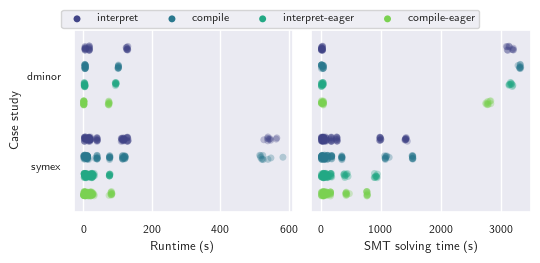

In [44]:
# Figure 6

plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2)
modes = ["interpret", "compile", "interpret-eager", "compile-eager"]
case_studies = ["dminor", "symex"]
sns.stripplot(
    data=eager_eval_data,
    y="case_study",
    hue="mode",
    x="time",
    jitter=True,
    dodge=True,
    hue_order=modes,
    order=case_studies,
    legend=None,
    alpha=0.3,
    ax=ax1,
    palette="viridis",
)
ax1.set(ylabel="Case study", xlabel="Runtime (s)")

sns.stripplot(
    data=eager_eval_data,
    y="case_study",
    hue="mode",
    x="smt_time",
    jitter=True,
    dodge=True,
    hue_order=modes,
    order=case_studies,
    legend=None,
    alpha=0.3,
    ax=ax2,
    palette="viridis",
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel="SMT solving time (s)")

leg = fig.legend(modes, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)
for lh in leg.legend_handles:
    lh.set_alpha(1)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(os.path.join("figures", "figure6.pdf"), bbox_inches="tight", dpi=100)

## Section 6.1 (Comparison to Reference Implementations)

In [45]:
speedup(times[times["benchmark"] != "luindex"], "scuba", baseline="compile")

all:
mean      1.091137
min       0.753892
median    0.981469
max       1.772528
dtype: float64

dminor:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

scuba:
mean      1.091137
min       0.753892
median    0.981469
max       1.772528
dtype: float64

symex:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64


/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [46]:
speedup(times[times["benchmark"] != "luindex"], "scuba", baseline="interpret")

all:
mean      3.518544
min       2.944299
median    3.354039
max       4.546826
dtype: float64

dminor:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

scuba:
mean      3.518544
min       2.944299
median    3.354039
max       4.546826
dtype: float64

symex:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64


/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [47]:
speedup(times, "compile-eager", baseline="klee")

all:
mean      104.406429
min         7.006786
median     11.843919
max       871.670702
dtype: float64

dminor:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      104.406429
min         7.006786
median     11.843919
max       871.670702
dtype: float64


/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [48]:
speedup(times, "interpret", baseline="klee")

all:
mean       35.365796
min         0.325817
median      9.425305
max       285.714286
dtype: float64

dminor:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean       35.365796
min         0.325817
median      9.425305
max       285.714286
dtype: float64


/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [49]:
speedup(times, "cbmc", baseline="compile-eager")

all:
mean      198.640607
min         0.262678
median      9.189803
max       892.833333
dtype: float64

dminor:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      198.640607
min         0.262678
median      9.189803
max       892.833333
dtype: float64


/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/abembenek/anaconda3/envs/mff-analysis/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [50]:
# Hard-code the Dminor times reported in the original Formulog paper
def dminor(row):
    match row["benchmark"]:
        case "all-1":
            return 1.5
        case "all-10":
            return 68
        case "all-100":
            return 1800


times["dminor"] = times.apply(dminor, axis=1)

In [56]:
# Table 2


def make_table_row(row, acc):
    def time(mode, is_ref=False):
        if mode == "scuba" and row["benchmark"] == "luindex":
            return "error"
        if pd.isnull(row[mode]):
            return "-"
        if row[mode] == 1800:
            return "TO"
        else:
            t = f"{row[mode]:0.2f}"
            em = t == best_flg and not is_ref
            bf = t == best
            if em:
                t = "{\\em %s}" % t
            if bf:
                t = "{\\bf %s}" % t
            return t

    if row["case_study"] == "dminor":
        ref = "dminor"
    elif row["case_study"] == "scuba":
        ref = "scuba"
    else:
        ref = "klee"
    ref_time = row[ref]
    if row["benchmark"] == "luindex":
        ref_time = 1000000000

    times = [
        row["interpret"],
        row["interpret-eager"],
        row["compile"],
        row["compile-eager"],
    ]
    best_flg = min(t for t in times if not pd.isnull(t))
    best = min(best_flg, ref_time)
    best_flg = f"{best_flg:0.2f}"
    best = f"{best:0.2f}"

    s = []
    if row["case_study"] != "scuba":
        s.append(r"\rowcolor{Gray} ")
    s.append(f"{row['case_study']} & {row['benchmark']}")
    s.extend([" & ", time("interpret")])
    s.extend([" & ", time("interpret-eager")])
    s.extend([" && ", time("compile")])
    s.extend([" & ", time("compile-eager")])
    s.extend([" && ", time(ref, True), r"\\"])
    acc.append("".join(s))


s = []
s.append(r"\documentclass{article}")
s.append(r"\usepackage{colortbl}")
s.append(r"\usepackage{multirow}")
s.append(r"\usepackage{color}")
s.append(r"\usepackage{booktabs}")
s.append(r"\definecolor{Gray}{gray}{0.9}")
s.append(r"\begin{document}")
s.append(r"\begin{tabular}{ll rr rrr rr}")
s.append(r"\toprule")
s.append(
    r"& & \multicolumn{2}{c}{Formulog interp. (s)} && \multicolumn{2}{c}{Formulog compile (s)} && Reference \\\\"
)
s.append(r"\cline{3-4} \cline{6-7}")
s.append(
    r"Case study & Benchmark & semi-naive & eager && semi-naive & eager && impl. (s) \\"
)
s.append(r"\midrule")
times.apply(lambda row: make_table_row(row, s), axis=1)
s.append(r"\bottomrule")
s.append(r"\end{tabular}")
s.append(r"\end{document}")
with open(os.path.join("figures", "table2.tex"), "w") as f:
    f.write("\n".join(s))